In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_absolute_error
from sklearn.tree import plot_tree, DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [106]:
# Load files into a pandas dataframe
df = pd.read_csv('data/Train.csv')
# Let’s observe the shape of our datasets.
print('train data shape :', df.shape)
# inspect train data
df.head()

train data shape : (23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [107]:
# drop columns I don't need for my model
df.drop('year', axis=1, inplace=True)
df.drop('uniqueid', axis=1, inplace=True)
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [108]:
df.columns

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  object
 2   location_type           23524 non-null  object
 3   cellphone_access        23524 non-null  object
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


Convert categorical features

In [110]:
# categorical features
cat_features = ['country', 'bank_account', 'location_type',
                    'cellphone_access', 'gender_of_respondent',
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type']



In [111]:
for item in cat_features:
    print(item, len(df[item].unique()), df[item].unique())

country 4 ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
bank_account 2 ['Yes' 'No']
location_type 2 ['Rural' 'Urban']
cellphone_access 2 ['Yes' 'No']
gender_of_respondent 2 ['Female' 'Male']
relationship_with_head 6 ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_status 5 ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
education_level 6 ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']
job_type 10 ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


In [112]:
df['bank_account'] = df['bank_account'].map({'No': 0, 'Yes': 1})
df['location_type'] = df['location_type'].map({'Rural': 0, 'Urban': 1})
df.columns = df.columns.str.replace('location_type','Urban_location')
df['cellphone_access'] = df['cellphone_access'].map({'No': 0, 'Yes': 1})
df['gender_of_respondent'] = df['gender_of_respondent'].map({'Male': 0, 'Female': 1})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  int64 
 2   Urban_location          23524 non-null  int64 
 3   cellphone_access        23524 non-null  int64 
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  int64 
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [113]:
# get dummies for categorical values
df = pd.get_dummies(df, columns=['country',
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   bank_account                                     23524 non-null  int64
 1   Urban_location                                   23524 non-null  int64
 2   cellphone_access                                 23524 non-null  int64
 3   household_size                                   23524 non-null  int64
 4   age_of_respondent                                23524 non-null  int64
 5   gender_of_respondent                             23524 non-null  int64
 6   country_Kenya                                    23524 non-null  bool 
 7   country_Rwanda                                   23524 non-null  bool 
 8   country_Tanzania                                 23524 non-null  bool 
 9   country_Uganda                                   2

In [115]:
cat_features = ['bank_account','Urban_location', 'cellphone_access', 'gender_of_respondent', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed']
df[cat_features] = df[cat_features].astype('category')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   bank_account                                     23524 non-null  category
 1   Urban_location                                   23524 non-null  category
 2   cellphone_access                                 23524 non-null  category
 3   household_size                                   23524 non-null  int64   
 4   age_of_respondent                                23524 non-null  int64   
 5   gender_of_respondent                             23524 non-null  category
 6   country_Kenya                                    23524 non-null  category
 7   country_Rwanda                                   23524 non-null  category
 8   country_Tanzania                                 23524 non-null  category
 9   country_Uganda   

Train-Test-Split and scaling with standartscaler

In [117]:
selected_features = ['Urban_location', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed']

In [118]:
X = df[selected_features]
y = df['bank_account']

In [119]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=y)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16466, 36)
(7058, 36)
(16466,)
(7058,)


In [121]:
X_train_2_sc = X_train[['household_size','age_of_respondent']]
X_test_2_sc = X_test[['household_size','age_of_respondent']]

In [122]:
# Scaling with MinMaxScaler
normalizer = MinMaxScaler()
X_train_sc = normalizer.fit_transform(X_train_2_sc)
X_test_sc = normalizer.transform(X_test_2_sc)

In [123]:
# Concatenating scaled and dummy columns 
X_train_prepro = np.concatenate([X_train_sc, X_train.drop(['household_size','age_of_respondent'], axis=1)], axis=1)
X_test_prepro = np.concatenate([X_test_sc, X_test.drop(['household_size','age_of_respondent'], axis=1)], axis=1)

Logistic Regression

In [124]:
def log_regression_model(X_train, X_test, y_train, y_test):
    # Modelling
    logistic_regression = LogisticRegression(max_iter=1000)
    logistic_regression.fit(X_train, y_train)

    y_pred = logistic_regression.predict(X_test) # prediction of the testdata
    y_train_proba = logistic_regression.predict_proba(X_train)
    y_test_proba = logistic_regression.predict_proba(X_test)

    accuracy = (round(accuracy_score(y_test, y_pred),2))
    precision =  (round(precision_score(y_test, y_pred),2))
    recall =  (round(recall_score(y_test, y_pred),2))
    mae =  (round(mean_absolute_error(y_test, y_pred),2))

    print('Metrics for Logistic Regression Model')
    print('---'*15)
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn',fmt=".0f")
    print('Accuracy: ', accuracy)
    print('Precision (TP/(TP+FP)): ', precision)
    print('Recall (TP/(TP+FN)): ', recall)
    print('MAE: ', mae)
    #ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test, normalize='all', cmap= 'YlGn')


    return(y_pred,y_train_proba,y_test_proba)

Metrics for Logistic Regression Model
---------------------------------------------
Confusion Matrix: 
[[5898  166]
 [ 658  336]]
Accuracy:  0.88
Precision (TP/(TP+FP)):  0.67
Recall (TP/(TP+FN)):  0.34
MAE:  0.12


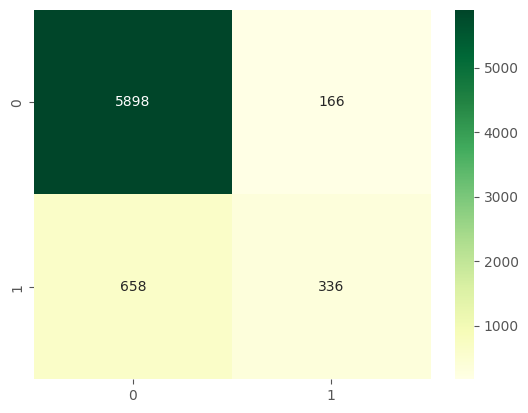

In [125]:
y_pred_log_regr,y_train_proba,y_test_proba = log_regression_model(X_train_prepro, X_test_prepro, y_train, y_test)

In [126]:
def log_regression_predict_from_treshold(y_target, y_proba, threshold=0.5):
    # Modelling
    y_pred = (y_proba >= threshold).astype(int)

    accuracy = (round(accuracy_score(y_target, y_pred),2))
    precision =  (round(precision_score(y_target, y_pred),2))
    recall =  (round(recall_score(y_target, y_pred),2))
    mae =  (round(mean_absolute_error(y_target, y_pred),2))
 
    return(y_pred, accuracy,precision,recall,mae)

In [127]:
len(y_test_proba[:,1])

7058

In [128]:
len(y_test)

7058

In [129]:
threshold_lst = list(np.linspace(0.1, 0.8, num=15))
threshold_lst

[0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35,
 0.4,
 0.45000000000000007,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7000000000000001,
 0.75,
 0.8]

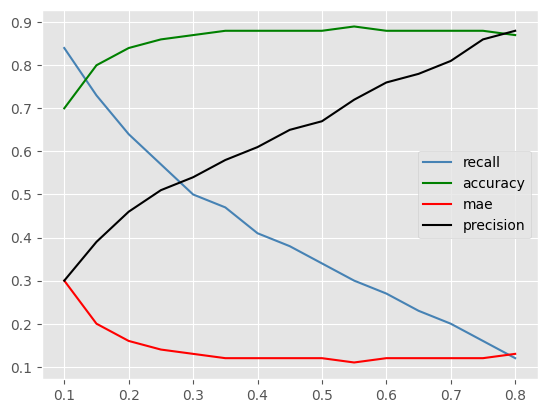

In [130]:
model_lst = []
#threshold_lst = list(np.linspace(0.2, 0.8, num=13))
for i in threshold_lst:
    y_pred, accuracy,precision,recall,mae = log_regression_predict_from_treshold(y_test, y_test_proba[:,1], i)
    model_lst.append({'threshold': i, 'accuracy': accuracy, 'precision':precision, 'recall': recall, 'mae':mae})

model_df = pd.DataFrame(model_lst)

# Plotting 
plt.style.use('ggplot') 

plt.plot(model_df.threshold, model_df.recall,c="steelblue", label="recall")
plt.plot(model_df.threshold, model_df.accuracy,c="green", label="accuracy")
plt.plot(model_df.threshold, model_df.mae,c="red", label="mae")
plt.plot(model_df.threshold, model_df.precision,c="black", label="precision")
plt.legend()

plt.show();